In [50]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
data = []

for _ in range(500):
    team_name = f"Team {chr(random.randint(65, 90))}"
    season = random.randint(2010 , 2023)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200, 1600)
    doubles = random.randint(200, 350)
    triples = random.randint(10, 40)
    home_runs = random.randint(100, 250)
    strike_outs = random.randint(1000, 1500)

    hits_adjusted = hits + (wins - 80) * 5
    doubles_adjusted = doubles + (wins - 80) * 2
    triples_adjusted = triples + (wins - 80) 
    home_runs_adjusted = home_runs + (wins - 80) * 3
    strike_outs_adjusted = strike_outs - (wins - 80) * 10

    data.append([team_name , season , wins , losses , hits_adjusted , doubles_adjusted , triples_adjusted , home_runs_adjusted , strike_outs_adjusted])


In [52]:
columns = ['Team' ,'Season' , 'Wins' , 'Losses' , 'Hits' , 'Doubles', 'Tripples' , 'HomeRuns' , 'StrikeOut']

In [53]:
df = pd.DataFrame(data = data , columns= columns)

In [54]:
df

,Team,Season,Wins,Losses,Hits,Doubles,Tripples,HomeRuns,StrikeOut
0,Team O,2014,80,82,1417,270,15,168,1001
1,Team C,2023,81,81,1484,235,18,189,1373
2,Team V,2018,104,58,1602,334,37,183,908
3,Team A,2014,64,98,1283,205,-3,53,1654
4,Team O,2010,92,70,1290,366,27,209,956
...,...,...,...,...,...,...,...,...,...
495,Team K,2016,77,85,1427,327,13,187,1078
496,Team E,2020,104,58,1549,389,38,305,854
497,Team T,2023,98,64,1327,312,57,181,944
498,Team D,2014,108,54,1478,340,61,194,838


In [55]:
df.head()

,Team,Season,Wins,Losses,Hits,Doubles,Tripples,HomeRuns,StrikeOut
0,Team O,2014,80,82,1417,270,15,168,1001
1,Team C,2023,81,81,1484,235,18,189,1373
2,Team V,2018,104,58,1602,334,37,183,908
3,Team A,2014,64,98,1283,205,-3,53,1654
4,Team O,2010,92,70,1290,366,27,209,956


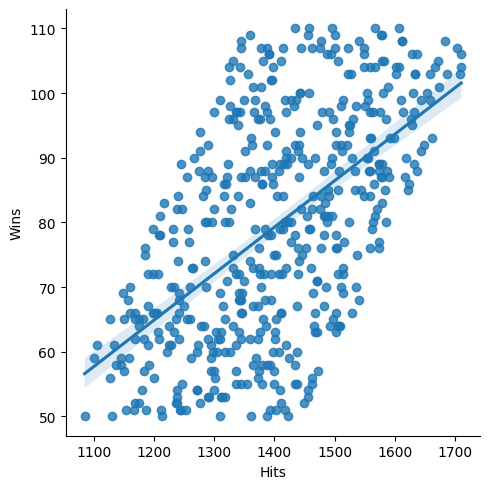

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.lmplot(x ='Hits' , y ='Wins' , data = df)
plt.show()

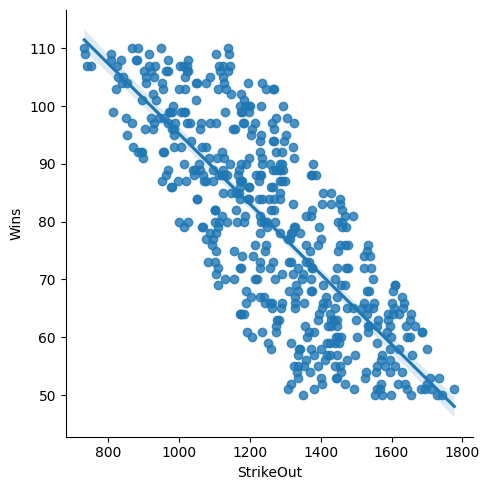

In [57]:
sns.lmplot(x = 'StrikeOut' ,y = 'Wins' , data = df)
plt.show()

In [58]:
df2 = df.drop(columns= ['Team' , 'Season', 'Losses'], axis = 1)

In [59]:
df2.head()

,Wins,Hits,Doubles,Tripples,HomeRuns,StrikeOut
0,80,1417,270,15,168,1001
1,81,1484,235,18,189,1373
2,104,1602,334,37,183,908
3,64,1283,205,-3,53,1654
4,92,1290,366,27,209,956


In [60]:
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Tripples', 'HomeRuns', 'StrikeOut'], dtype='object')

In [61]:
X = df[['Hits', 'Doubles', 'Tripples', 'HomeRuns', 'StrikeOut']]
y = df[['Wins']]

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 24)

In [63]:
X_train

,Hits,Doubles,Tripples,HomeRuns,StrikeOut
211,1242,274,20,101,1559
84,1186,316,5,150,1155
398,1245,197,-7,108,1693
118,1468,278,26,251,1234
126,1396,256,49,312,1176
...,...,...,...,...,...
401,1487,343,50,266,1116
343,1470,240,15,215,1104
192,1318,213,8,86,1707
387,1366,241,33,160,1088


In [64]:
X_train

,Hits,Doubles,Tripples,HomeRuns,StrikeOut
211,1242,274,20,101,1559
84,1186,316,5,150,1155
398,1245,197,-7,108,1693
118,1468,278,26,251,1234
126,1396,256,49,312,1176
...,...,...,...,...,...
401,1487,343,50,266,1116
343,1470,240,15,215,1104
192,1318,213,8,86,1707
387,1366,241,33,160,1088


In [65]:
model_lr = LinearRegression()

In [66]:
model_lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
model_lr.score(X_test, y_test)

0.9045153203061349

In [68]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [70]:
y_pred = model_lr.predict(X_test)


In [71]:
mean_absolute_error(y_test , y_pred)

4.555610209013721

In [72]:
mean_squared_error(y_test , y_pred)

30.342319441807003

In [73]:
r2_score(y_test , y_pred)

0.9045153203061349

In [74]:
model_lr.coef_

array([[ 0.00915764,  0.03230312,  0.43076873,  0.05600359, -0.01715935]])

In [75]:
model_lr.intercept_

array([59.25122709])